In [1]:
import os
import shutil
import datetime
file_name = os.path.basename(globals()['__vsc_ipynb_file__'])

# Get the current date and time
now = datetime.datetime.now()
timestamp = now.strftime('%Y%m%d%H%M')

# Construct the filename for the new file
new_filename = f"{os.path.splitext(file_name)[0]}_{timestamp}{os.path.splitext(file_name)[1]}"

# Copy the original file to the new file path
shutil.copy(file_name, new_filename)

'thesis_202401101343.ipynb'

In [2]:
import os
import datetime
import shutil
import glob
import dask.dataframe as dd
import numpy as np
import pandas as pd
import igraph as ig
from igraph import Graph
import winsound
import pyarrow.feather as feather
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import openpyxl
import pickle
from hazm import *
import re
import csv
from datetime import datetime
# import polars as pl
# import louvain
# import leidenalg
# import networkx as nx
# from typing import List

# FUNCTION DEFINITION START

In [3]:
normalizer = Normalizer()

In [4]:

valid_character = [u"آ", u"ئ", u"ا", u"ب", u"ت", u"ث", u"ج", u"ح", u"خ", u"د",
                        u"ذ", u"ر", u"ز", u"س", u"ش", u"ص", u"ض", u"ط", u"ظ", u"ع",
                        u"غ", u"ف", u"ق", u"ل", u"م", u"ن", u"ه", u"چ", u"ژ", u"ک",
                        u"گ", u"ی", u"ی", u" ", u"و", u"پ", u"\u200c"]

dic_incorrect_to_correct = {u"ٱ": u"آ", u"ﺁ": u"آ",
                                 u"ﺌ": u"ئ", u"ﺋ": u"ئ",
                                 u"ﺍ": u"ا", u"ﺎ": u"ا",
                                 u"ﺏ": u"ب", u"ﺒ": u"ب", u"ﺐ": u"ب", u"ﺑ": u"ب",
                                 u"ﺕ": u"ت", u"ﺗ": u"ت", u"ﺖ": u"ت", u"ﺘ": u"ت",
                                 u"ﺚ": u"ث", u"ﺛ": u"ث", u"ﺜ": u"ث",
                                 u"ﺞ": u"ج", u"ﺠ": u"ج", u"ﺟ": u"ج", u"ﺝ": u"ج",
                                 u"ﺤ": u"ح", u"ﺣ": u"ح", u"ﺢ": u"ح",
                                 u"ﺨ": u"خ", u"ﺧ": u"خ", u"ﺦ": u"خ",
                                 u"ﺩ": u"د", u"ﺪ": u"د",
                                 u"ﺬ": u"ذ", u"ﺫ": u"ذ",
                                 u"ﺭ": u"ر", u"ﺮ": u"ر",
                                 u"ﺰ": u"ز", u"ﺯ": u"ز",
                                 u"ﺲ": u"س", u"ﺱ": u"س", u"ﺴ": u"س", u"ﺳ": u"س",
                                 u"ﺵ": u"ش", u"ﺶ": u"ش", u"ﺸ": u"ش", u"ﺷ": u"ش",
                                 u"ﺺ": u"ص", u"ﺼ": u"ص", u"ﺻ": u"ص",
                                 u"ﺿ": u"ض", u"ﻀ": u"ض", u"ﺽ": u"ض",
                                 u"ﻂ": u"ط", u"ﻄ": u"ط", u"ﻃ": u"ط",
                                 u"ﻈ": u"ظ", u"ﻇ": u"ظ",
                                 u"ﻊ": u"ع", u"ﻌ": u"ع", u"ﻋ": u"ع", u"ﻉ": u"ع",
                                 u"ﻎ": u"غ", u"ﻐ": u"غ", u"ﻏ": u"غ", u"ﻍ": u"غ",
                                 u"ﻑ": u"ف", u"ﻒ": u"ف", u"ﻔ": u"ف", u"ﻓ": u"ف",
                                 u"ﻕ": u"ق", u"ﻖ": u"ق", u"ﻘ": u"ق", u"ﻗ": u"ق",
                                 u"ﻝ": u"ل", u"ﻞ": u"ل", u"ﻠ": u"ل", u"ﻟ": u"ل",
                                 u"ﻡ": u"م", u"ﻢ": u"م", u"ﻤ": u"م", u"ﻣ": u"م",
                                 u"ﻦ": u"ن", u"ﻥ": u"ن", u"ﻨ": u"ن", u"ﻧ": u"ن",
                                 u"ە": u"ه", u"ھ": u"ه", u"ﻬ": u"ه", u"ﻩ": u"ه", u"ﻫ": u"ه",
                                 u"ﻪ": u"ه",
                                 u"ﮤ": u"ه",
                                 u"ۀ": u"ه", u"ة": u"ه", u"ہ": u"ه",
                                 u"ۆ": u"و", u"ﻭ": u"و", u"ﻮ": u"و", u"ۊ": u"و", u"ؤ": u"و",
                                 u"ﭙ": u"پ", u"ﭘ": u"پ", u"ﭗ": u"پ",
                                 u"ﭻ": u"چ", u"ﭽ": u"چ", u"ﭼ": u"چ",
                                 u"ﮊ": u"ژ",
                                 u"ﻛ": u"ک", u"ﻛ": u"ک", u"ﮏ": u"ک", u"ﮑ": u"ک", u"ﮐ": u"ک",
                                 u"ك": u"ک",
                                 u"ڪ": u"ک",
                                 u"ﻚ": u"ک", u"ګ": u"ک", u"ﻜ": u"ک",
                                 u"ﮓ": u"گ", u"ﮒ": u"گ", u"ﮕ": u"گ", u"ﮔ": u"گ",
                                 u"ﻱ": u"ی", u"ﻲ": u"ی", u"ﯾ": u"ی", u"ﻰ": u"ی", u"ﻴ": u"ی",
                                 u"ﻯ": u"ی",
                                 u"ﻳ": u"ی",
                                 u"ﯼ": u"ی", u"ﯽ": u"ی", u"ﯿ": u"ی", u"ي": u"ی", u"ى": u"ی",
                                 u"ے": u"ی",
                                 u"ێ": u"ی",
                                 u"ې": u"ی",
                                 u"ّ": u"",  # تشدید
                                 u"\u2009": u" ", u"\u200a": u" ", u"\u00a0": u" ",  # space \u00a0
                                 u"\u200e": u"\u200c", u"\u2029": u"\u200c"  ,# halfspace
                                u"\u200c":' '
                                 }



In [5]:
def clean_character( text):
    """
    متن را تبدیل به لیستی از کاراکتر می‌کند و تک تک آنها را اصلاح می‌کند در آخر کاراکترها را بهم چسبنده تا متن تمیز شده و کامل بدست آید
    :param text: متن ورودی
    :return: متن تمیز شده و تعداد کاراکترهایی که تمیز شده
    """
    if isinstance(text, bytes):
        text = text
    number_of_edits = 0
    text = re.sub("\s\s+", " ", text).strip()
    list_char = list(text)

    for index, val in enumerate(list_char):
        if val in dic_incorrect_to_correct:
            list_char[index] = dic_incorrect_to_correct[val]
            number_of_edits += 1
    output = ('').join(list_char)
    return output, number_of_edits

In [6]:
def clean_text( text_or_list):
    """
    در این تابع علاوه بر اصلاح کاراکترها به فرم استاندارد، تمامی کاراکترهای غیر الفبای فارسی و اعداد و همچنین نقطه و نیمفاصله حذف می‌شوند
    :param text_or_list: ورودی یک متن یا لیستی از متن هست
    :return: خروجی متن تمیزشده است
    """
    if not type(text_or_list) == list:
        if isinstance(text_or_list, str):
            text_or_list = text_or_list
        text_or_list = normalizer.normalize(text_or_list)
        regex = u"[^" + ('').join(valid_character) + u"]"
        clean_text, _ = clean_character(text_or_list)
        clean_text = re.sub(regex, " ", clean_text)
        clean_text = re.sub("\s\s+", " ", clean_text).strip()

        return clean_text
    if type(text_or_list) == list:
        clean_list_names = []
        regex = u"[^" + ("").join(valid_character) + u"]"
        for name in text_or_list:
            name = normalizer.normalize(name)
            name_unicode = name
            if isinstance(name, str):
                name_unicode = name

            clean_name, _ = clean_character(name_unicode)
            clean_name = re.sub(regex, " ", clean_name)
            clean_name = re.sub("\s+", " ", clean_name).strip()
            if clean_name.strip() != "":
                clean_list_names.append(clean_name.strip())

        update_clean_list_names = [x for x in clean_list_names if x]
        return update_clean_list_names.split()

In [7]:
f = open('stopwords.txt','r', encoding='utf-8')
stopwords = [f.strip() for f in f.readlines()]

In [8]:
def time_split(df,start,duration_days, overlap_days, steps):
    from datetime import datetime, timedelta
    start_time = datetime.strptime(start, "%Y-%m-%d %H:%M:%S")
    lenght = timedelta(days=duration_days)
    step_df = []
    for step in range(steps):
        step_begin = start_time + (step * lenght) - (step * timedelta(days=overlap_days))
        step_end = step_begin + timedelta(days=duration_days)
        step_begin = step_begin.strftime('%Y-%m-%d %H:%M:%S')
        step_end = step_end.strftime('%Y-%m-%d %H:%M:%S')
        print("from", step_begin, "to", step_end)
        condition = ((df['pubdate'] >= step_begin) & (df['pubdate'] < step_end))
        print(len(df[condition]))
        step_df.append(df[condition])
    return step_df

In [9]:
# Filter edges that their weights are more than threshold

def filter_weight(df_edges_input, threshold):

    df_edges = df_edges_input.copy()
    
    df_edges['key'] = [(str(x[0]) + str(x[1])) for x in np.sort(df_edges[['edge_source','edge_target']].values,axis=1)]

    counts = df_edges.groupby('key')['key'].size()
    to_keep = counts[counts > threshold].index

    # Add edge column
    df_edges['edge'] = 0 

    # Get boolean array of duplicates
    duplicated = df_edges['key'].duplicated() 

    # Assign values
    df_edges.loc[~duplicated, 'edge'] = 1

    # Set edge to 1 for rows to keep  
    df_edges.loc[~df_edges['key'].isin(to_keep), 'edge'] = 0

    # Set edge to 0 for edge_target=0
    df_edges.loc[df_edges['edge_target']==0, ['edge']] = 0

    # Set edge to 0 for self-loop edges
    df_edges.loc[(df_edges['edge_source'] == df_edges['edge_target']), ['edge']] = 0

    # Remove key column
    df_edges = df_edges.drop(columns =['key'])

    return df_edges

In [20]:
import networkx as nx
import pandas as pd

# Function to create a NetworkX graph from a pandas DataFrame
def create_graph_nx(df_edges):
    # Dictionary to map IDs to indices
    id_to_index = {}
   
    # Create a directed graph
    g = nx.DiGraph()

    desc = dict()
   
    c = 1
    # Iterate over each row in the DataFrame
    for i, e in df_edges.iterrows():
        # Get the source and target nodes
        source = e['edge_source']
        target = e['edge_target']

        # Get the description and publication date
        description = e['description']
        pubdate = e['pubdate']
       
        if source in desc.keys():
            desc[source] += (" " + description)
        else:
            desc[source] = description

        if target != 0 and source != target:
            # Add the source node to the graph if it doesn't exist
            if source not in id_to_index:
                id_to_index[source] = len(id_to_index)
                g.add_node(source)
                g.nodes[source]['user_id'] = source
                g.nodes[source]['description'] = ''
                print(str(len(df_edges) - c) + " " + str(pubdate) + " " * 50, end="\r")
           
            # Add the target node to the graph if it doesn't exist
            if target not in id_to_index:
                id_to_index[target] = len(id_to_index)
                g.add_node(target)
                g.nodes[target]['user_id'] = target
                g.nodes[target]['description'] = ''
                print(str(len(df_edges) - c) + " " + str(pubdate) + " " * 50, end="\r")
           
            # Format the publication date
            edge_pubdate = str(pubdate)[:4] + str(pubdate)[5:7] + str(pubdate)[8:10] + str(pubdate)[11:13] + str(pubdate)[14:16] + str(pubdate)[17:19]
            
            # Add the edge to the graph
            if g.has_edge(source, target):
                g.edges[(source, target)]['weight'] +=1                
            else:
                g.add_edge(source, target, weight=1, pubdate=edge_pubdate)
        
        c += 1

    for u in g.nodes:
        if u in desc.keys():
            g.nodes[u]['description'] = desc[u]
    
       
        # Update the description of the source node
    print(f"\n{len(desc)}")
   
    # Return the graph
    print(g)
    return g

In [11]:
# Convert networkx to igraph

def nx_to_ig(graph_nx):

    import igraph as ig
    import networkx as nx

    graph_ig = ig.Graph.from_networkx(graph_nx)

    del graph_ig.vs['_nx_name']

    return graph_ig

In [12]:
#describe a graph
def graph_describe(g):
    import igraph as ig
    from igraph import Graph
    import networkx as nx
    import community as community_louvain

    g_type = str(type(g))[8:14]
    g_u = g.copy()
    g_u.to_undirected()
    print(g_u.summary())
    
    if g_type == "igraph":
        vscount = g.vcount()
        print(f'Number of vertices: {vscount:,d}')
        escount = g.ecount()
        print(f'Number of edges: {escount:,d}')
        avg_deg = ig.mean(g.degree())
        print(f'Average degree: {avg_deg:0.2f}')
        min_degree = min(g.degree())
        print(f'Minmum degree: {min_degree:,d}')
        max_degree = max(g.degree())
        print(f'Maximum degree: {max_degree:,d}')
        components_num = len(g.connected_components(mode="weak"))
        print(f'Number of component: {components_num:,d}')
        louvain_comm_num = len(g_u.community_multilevel())
        print(f'Number of communities(Louvain): {louvain_comm_num:,d}')
        vsatt = g.vs.attributes()
        print(f'Graph vertices attributes: {vsatt}')
        esatt = g.es.attributes()
        print(f'Graph edges attributes: {esatt}')
    else:
        vscount = g.number_of_nodes()
        print(f'Number of vertices: {vscount:,d}')
        escount = g.number_of_edges()
        print(f'Number of edges: {escount:,d}')
        avg_deg = sum(d for n, d in g.degree()) / g.number_of_nodes()
        print(f'Average degree: {avg_deg:0.2f}')
        min_degree = min(g.degree(), key=lambda x: x[1])[1]
        print(f'Minmum degree: {min_degree:,d}')
        max_degree = max(g.degree(), key=lambda x: x[1])[1]
        print(f'Maximum degree: {max_degree:,d}')
        components_num = nx.number_connected_components(g)
        print(f'Number of component: {components_num:,d}')
        partition = community_louvain.best_partition(g)
        louvain_comm_num = max(partition.values()) + 1
        print(f'Number of communities(Louvain): {louvain_comm_num:,d}')
        vsatt = list(list(g.nodes(data=True))[0][1].keys())
        print(f'Graph vertices attributes: {vsatt}')
        esatt = list(list(g.edges(data=True))[0][2].keys())
        print(f'Graph edges attributes: {esatt}')

In [13]:
def select_giant_component(g):
    # Get the components of the graph
    components = g.components(mode="weak")

    # Find the component with the largest number of vertices
    largest_component = max(components, key=len)

    # Extract the giant component
    giant_component = g.subgraph(largest_component)
    
    return giant_component

In [14]:
def convert_communities(communities):
    community_assignments = [0] * sum(len(c) for c in communities)
    for i, community in enumerate(communities):
        for node in community:
            community_assignments[node] = i
    return community_assignments


In [15]:
def crr(graph, p, steps):
    # Initialize E' and i
    E_prime = set()

    # Calculate P
    P = p * graph.ecount()

    # Calculate betweenness centrality and sort edges
    edge_betweenness = graph.edge_betweenness()
    edges_sorted = sorted(graph.es, key=lambda e: -edge_betweenness[e.index])

    # Add edges to E_prime until its size is P
    i = 0
    while len(E_prime) < round(P):
        e = edges_sorted[i]
        E_prime.add(e)
        i += 1

    # Perform the edge swapping steps times
    for _ in range(steps):
        # Pick random edges e1 from E' and e2 from E-E_prime
        e1 = np.random.choice(list(E_prime))
        u = e1.source
        v = e1.target
        e2 = np.random.choice(list(set(graph.es) - E_prime))
        x = e2.source
        y = e2.target


        # Calculate dis(a) and d1, d2
        graph_prime = graph.subgraph_edges(E_prime, delete_vertices=False)
        dis = lambda a: -graph.degree(a) * p + graph_prime.degree(a)
        d1 = abs(dis(u) - 1) + abs(dis(v) - 1) - (abs(dis(u)) + abs(dis(v)))
        d2 = abs(dis(x) + 1) + abs(dis(y) + 1) - (abs(dis(x)) + abs(dis(y)))

        # Swap edges if d1 + d2 < 0
        if d1 + d2 < 0:
            E_prime.remove(e1)
            E_prime.add(e2)

    # Return reduced graph
    return graph.subgraph_edges(E_prime, delete_vertices=True)

In [16]:
def bm2(G, p):# Old
    # phase 1
    E = [i for i in G.es]
    b = [ round(p * i) for i in G.degree()]

    # Calculate the initial selected edges
    E_m = []
    G_prime_deg = [0] * len(G.degree())
    i = 0
    for e in G.es:
        i += 1
        print(f"Calculating E_m: edge {i}", end = "\r")
        u = e.source
        v = e.target
        if G_prime_deg[u] < b[u] and G_prime_deg[v] < b[v]:
            E_m.append(e)
            G_prime_deg[G.vs[u].index] += 1
            G_prime_deg[G.vs[v].index] += 1

    E_star = [i for i in E if i not in E_m]
   
    # phase 2
    # Calulate dis(u)
    dis_func = lambda v: -G.degree(v) * p + G_prime_deg[v.index]
    dis = {i : dis_func(i) for i in G.vs}

    # do vertices classification
    A, B = [[], []]
    i = 0
    for u in G.vs:
        i += 1
        if dis[u] <= -0.5:
            A.append(u)
        elif -0.5 < dis[u] <0:
            B.append(u)

    # Calculate G_star edges list
    W = []
    G_star_e = []
    i = 0
    for e in E_star.copy():
        i += 1
        u = G.vs[e.source]
        v = G.vs[e.target]     
        gain1 = round(abs(dis[u]) + 2 * abs(dis[v]) - abs(1 + dis[u]) - 1, 2)
        gain2 = round(abs(dis[v]) + 2 * abs(dis[u]) - abs(1 + dis[v]) - 1, 2)
        if u in A and v in B and gain1 >= 0:
            W.append(gain1)
            G_star_e.append((e.source, e.target))
        elif u in B and v in A and gain2 >= 0:
            W.append(gain2)
            G_star_e.append((e.target, e.source))
        else:
            E_star.remove(e)

    # Create bipartite graph
    G_star = G.subgraph_edges(E_star, delete_vertices = True)

    G_star.es['gain'] = W

    # Select Supplementary edges from bipartite graph
    E_BP = []
    Q = sorted(G_star.es, key = lambda i: i['gain'], reverse=True)
    iteration = 1
    while len(Q):
        print("----- Iteration", iteration, "-----", len(Q), 30 * " ", end="\r")
        e = Q.pop(0)
        a = e.source
        b = e.target
        if G_star.vs[a] not in A:
            a, b = b, a
        source_adj = [edge for edge in Q if edge.source == a] if G_star.vs[a] in A else [edge for edge in Q if edge.target == a]
        if e['gain'] !=0:
            E_BP.append(e)
            a_edge = G.vs.find(user_id = G_star.vs[a]['user_id'])
            dis[a_edge] += 1
            if -1 < dis[a_edge] <= -0.5:
                for e_prime in source_adj:
                    x_temp = e_prime.target if G_star.vs[a] in A else e_prime.source
                    gain = round(abs(dis[a_edge]) + 2 * abs(dis[G.vs[x_temp]]) - abs(1 + dis[a_edge]) -1, 3)
                    e_prime['gain'] = gain
                    if gain > 0:
                        Q = sorted(sorted(Q), key = lambda i: i['gain'], reverse=True)
                    else:
                        Q.remove(e_prime)
            elif dis[a_edge] > -0.5:
                for e_prime in source_adj:
                    Q.remove(e_prime)
        iteration += 1
    
    E_BP = [i for i in E_BP if i['gain'] != 0]

    E_prime = sorted(E_m + E_BP)
    G_prime = G.subgraph_edges(E_prime, delete_vertices = True)

    return G_prime

In [17]:
def bm2_2(G, p):
    import heapq
    # phase 1

    b = {v: round(p * G.degree(v)) for v in G.vs}

    # Calculate the initial selected edges
    E_m = set()
    G_prime_deg = {v: 0 for v in G.vs}
    i = 0
    for e in G.es:
        u = G.vs[e.source]
        v = G.vs[e.target]
        if G_prime_deg[u] < b[u] and G_prime_deg[v] < b[v]:
            E_m.add(e)
            G_prime_deg[u] += 1
            G_prime_deg[v] += 1

    E_star = set(G.es) - E_m

    G_b_match = G.subgraph_edges(E_m, delete_vertices = False)
   

    # phase 2
    # Calulate dis(u)
    dis_func = lambda v: G_b_match.degree(v) - p * G.degree(v)
    dis = {v : dis_func(v) for v in G.vs}

    # do vertices classification
    A, B = [set(), set()]
    i = 0
    for u in G.vs:
        i += 1
        if dis[u] <= -0.5:
            A.add(u)
        elif -0.5 < dis[u] <0:
            B.add(u)

    # Calculate G_star edges list
    W = []
    i = 0
    for e in E_star.copy():
        i += 1
        u = G.vs[e.source]
        v = G.vs[e.target]     
        gain1 = round(abs(dis[u]) + 2 * abs(dis[v]) - abs(1 + dis[u]) - 1, 2)
        gain2 = round(abs(dis[v]) + 2 * abs(dis[u]) - abs(1 + dis[v]) - 1, 2)
        if u in A and v in B and gain1 > 0:
            W.append(gain1)
        elif u in B and v in A and gain2 > 0:
            W.append(gain2)
        else:
            E_star.remove(e)
    

    G_star = G.subgraph_edges(E_star, delete_vertices = True)
    G_star.es['gain'] = W

    # Create bipartite
    E_BP = set()
    Q = [(-e['gain'], e) for e in G_star.es]
    heapq.heapify(Q)
    iteration = 1
    while Q:
        print("----- Iteration", iteration, "-----", len(Q))#, 50 * " ", end="\r")
        item = heapq.heappop(Q)
        gn, e = item[0], item[1]
        print(f"gain= {-gn}")
        a = e.source
        b = e.target
        if G_star.vs[a] not in A:
            a, b = b, a
        source_adj = set([item[1] for item in Q if item[1].source == a] if G_star.vs[a] in A else [item[1] for item in Q if item[1].target == a])
        target_adj = set([item[1] for item in Q if item[1].target == b] if G_star.vs[a] in A else [item[1] for item in Q if item[1].source == b])
        (Q.remove((-tar_adj['gain'],tar_adj)) for tar_adj in target_adj)
        heapq.heapify(Q)
        E_BP.add(e)
        a_vertex = G.vs.find(user_id = G_star.vs[a]['user_id'])
        dis[a_vertex] += 1
        print(f"dis[a]= {dis[a_vertex]}")
        if -1 < dis[a_vertex] <= -0.5:
            for e_prime in source_adj:
                x_temp = e_prime.target if G_star.vs[a] in A else e_prime.source
                old_gain = G_star.es[e_prime.index]['gain']
                gain = round(abs(dis[a_vertex]) + 2 * abs(dis[G.vs[x_temp]]) - abs(1 + dis[a_vertex]) -1, 3)
                e_prime['gain'] = gain
                Q[Q.index((-old_gain, e_prime))] = (-gain, e_prime)
                heapq.heapify(Q)
                if gain <= 0:
                    Q.remove((-e_prime['gain'], e_prime))
                    heapq.heapify(Q)
        elif dis[a_vertex] > -0.5:
            for e_prime in source_adj:
                Q.remove((-e_prime['gain'], e_prime))
                heapq.heapify(Q)
        iteration += 1
    
    E_BP = {i for i in E_BP if i['gain'] != 0}

    E_prime = sorted(E_m.union(E_BP))
    G_prime = G.subgraph_edges(E_prime, delete_vertices = True)

    return G_prime

In [18]:
def louvain_communities(graph):
    user_ids = [node['user_id'] for node in graph.vs]
    communities_by_index = graph.community_multilevel()
    communities = []
    for community in list(communities_by_index):
        user_id_community = []
        for node_index in community:
            user_id_community.append(user_ids[node_index])
        communities.append(user_id_community)
    graph.vs["community"] = communities_by_index.membership
    return communities

In [19]:
def plot_communities(graph, communities):
    undirectd_graph = graph
    undirectd_graph.to_undirected()
    degree = graph.degree()
    visual_style = {
        "vertex_size": 10, # [int(x)+20 for x in degree],
        "vertex_color": vertex_colors,
        "vertex_label": None, # g.vs['label'],
        "vertex_label_size": 1,
        "vertex_label_color": "white",
        "edge_width": 0.5,
        "edge_color": "gray",
        "edge_arrow_size": 0.5,
        "edge_arrow_width": 1,
        "layout": graph.layout("fr"),
        "mark_groups" : True,
        "bbox": (3000, 2500),
        "margin": 100, 
    }

    ig.plot(undirectd_graph, 'communities.svg', **visual_style)
    # ig.plot(communities, "communities.svg", **visual_style)

# FUNCTION DEFINITION END

In [179]:
# drop unwanted columns and aggregate all files for creating network
cols_to_select = ['tweetid', 'description', 'pubdate', 'source', 
                  'tweet_type', 'in_reply_to_user_id', 'retweeted_user_id', 
                  'user_id', 'user_verified', 'in_reply_to_status_id', 
                  'user_friends_count', 'user_followers_count'
                  ]

In [186]:
# Aggrigate All 3184 csv files in All folder
folder_path = 'E:\\Network_Science\\14- Thesis\\Dataset\\Twitter\\Netlytic\\Soltani'

# Select columns used for aggregation
cols_to_select = {'user_id':np.int64, 'tweetid':np.int64, 'description':str, 'in_reply_to_user_id':np.int64, 'in_reply_to_status_id':np.int64, 
                  'retweeted_user_id':np.int64, 'retweeted_status_id':np.int64, 'pubdate':str, 'tweet_type':str, 
                  'user_verified':np.float64 
}

pd.set_option('display.float_format', None)

# get a list of CSV files in the folder
file_names = glob.glob(os.path.join(folder_path, "*.csv"))

# sort the list of files by date modified, from oldest to newest
file_names = sorted(file_names, key=os.path.getmtime)

# Use a generator expression to read each CSV file with only the specified columns
df_from_each_file = (dd.read_csv(f, usecols=cols_to_select.keys(), assume_missing=True, dtype=cols_to_select) for f in file_names)

df_list = list(df_from_each_file)

# Concatenate the dataframes
concatenated_df = dd.concat(df_list)

# Compute the final dataframe
aggregated_df_description = concatenated_df.compute()

In [187]:
aggregated_df_description.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12827123 entries, 0 to 82842
Data columns (total 10 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   tweetid                int64  
 1   description            object 
 2   pubdate                object 
 3   tweet_type             object 
 4   in_reply_to_user_id    int64  
 5   in_reply_to_status_id  int64  
 6   retweeted_user_id      int64  
 7   retweeted_status_id    int64  
 8   user_id                int64  
 9   user_verified          float64
dtypes: float64(1), int64(6), object(3)
memory usage: 1.1+ GB


In [188]:
# Remove duplicate tweets based on tweetid
aggregated_df_description = aggregated_df_description.drop_duplicates(subset ="tweetid", keep = "first", inplace = False)

In [189]:
aggregated_df_description.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6570133 entries, 0 to 82842
Data columns (total 10 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   tweetid                int64  
 1   description            object 
 2   pubdate                object 
 3   tweet_type             object 
 4   in_reply_to_user_id    int64  
 5   in_reply_to_status_id  int64  
 6   retweeted_user_id      int64  
 7   retweeted_status_id    int64  
 8   user_id                int64  
 9   user_verified          float64
dtypes: float64(1), int64(6), object(3)
memory usage: 551.4+ MB


In [190]:
# Sort by tweetid (pubdate)
aggregated_df_description = aggregated_df_description.sort_values(by='tweetid')

In [28]:
# convert pubdate type from string to datetime
aggregated_df_description['pubdate'] = pd.to_datetime(aggregated_df_description['pubdate'])

In [29]:
# replace Nan values of column user_verified with 0.0
aggregated_df_description['user_verified'] = aggregated_df_description['user_verified'].fillna(0.0)


In [31]:
df = aggregated_df_description

In [32]:
df = df.reset_index(drop=True)

In [35]:
# save the DataFrame to disk in .feather format
feather.write_feather(aggregated_df_description, 'aggregated_df_description.feather')

In [36]:
import winsound
winsound.Beep(2000, 350)

In [39]:
df['description'] = df['description'].apply(clean_text)

In [42]:
# aggregated_df_description_clean = df

In [43]:
# save the DataFrame to disk in .feather format
feather.write_feather(aggregated_df_description_clean, 'aggregated_df_description_clean.feather')

In [44]:
# save the DataFrame to disk with compression
aggregated_df_description_clean.to_csv('aggregated_df_description_clean.csv', index=False)

# READ AGGREGATED FILE

In [45]:
# specify the path of the .feather file
file_path = 'E:\\Network_Science\\14- Thesis\\Dataset\\Twitter\\Netlytic\\aggregated_df_description.feather'

# read the dataframe from the .feather file
aggregated_df_description = pd.DataFrame(feather.read_feather(file_path))

In [46]:
aggregated_df_description_clean.info()

In [47]:
selected_columns = ['tweetid', 'pubdate', 'user_id']
print(aggregated_df_description_clean.loc[:10, selected_columns])

In [48]:
df_twitter = aggregated_df_description_clean

In [49]:
df_twitter = df_twitter[(df_twitter['pubdate'] > pd.Timestamp("2023-03-17 00:00:00")) & (df_twitter['pubdate'] < pd.Timestamp("2023-03-18 00:00:00"))]


In [52]:
# save the DataFrame to disk with compression
df_twitter.to_csv('df_twitter.csv', index=False)

In [53]:
winsound.Beep(2000, 350)

In [54]:
# Draw tweets frequency bar chart during time
df = aggregated_df_description
# Set the bin size (in days)
bin_size = 7

# Define the start and end dates for the bins
start_date = df['pubdate'].min()
end_date = df['pubdate'].max()

# Generate a list of bin edges
bin_edges = pd.date_range(start=start_date, end=end_date, freq=f'{bin_size}D')

# Calculate the tweet counts per bin
tweet_counts, _ = pd.cut(df['pubdate'], bins=bin_edges, include_lowest=True, right=False, retbins=True)[0:2]
tweet_counts = pd.Series(tweet_counts).value_counts().sort_index().values

# Set the plot title and axis labels
fig, ax = plt.subplots(figsize=(15, 6))

# # Add a margin at the top of the plot
# fig.subplots_adjust(top=2)

ax.set_title(f'Tweet counts per {bin_size}-day period')
ax.set_xlabel('Date')
ax.set_ylabel('Tweet count')

# Set the x-axis tick labels to show only the date (not the time)
ax.set_xticks(bin_edges)
ax.set_xticklabels([d.date() for d in bin_edges], rotation=90, ha='right', fontsize=7)

# Set the width of the bars
width = 0.75 * (bin_edges[1] - bin_edges[0]).days

# Create a bar chart of the tweet counts per bin
bars = ax.bar(bin_edges[:-1], tweet_counts, width=width, align='edge')

# Add text labels at the top of each bar
for bar, count in zip(bars, tweet_counts):
    if count<4200000:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), '  {:,}'.format(count), 
                ha='center', va='bottom', rotation=90, fontsize=7)
    else:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), '{:,}'.format(count), 
                ha='center', va='top', rotation=90, fontsize=7, color='white')

# Set the y-axis ticks to show every 500,000 tweets
ax.yaxis.set_major_locator(ticker.MultipleLocator(500000))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))

# Show the plot
plt.show()

In [55]:
# Count the number of True and False values in the user_verified column

df = aggregated_df_description
verified_counts = df['user_verified'].value_counts()

# Create a bar chart of the verified user counts
fig, ax = plt.subplots()

bars = ax.bar(['Not verified', 'Verified'], verified_counts)

# Add text labels at the top of each bar
for bar, count in zip(bars, verified_counts):
    if count<100000000:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height()*10, '  {:,}'.format(count), 
                ha='center', va='bottom', rotation=0, fontsize=10)
    else:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height()*0.98, '{:,}'.format(count), 
                ha='center', va='top', rotation=0, fontsize=10, color='white')
ax.set_title('Distribution of User Verification')
ax.set_xlabel('Verification Status')
ax.set_ylabel('Number of Users')

plt.show()

In [56]:
df = df_twitter

In [57]:
# Add edge source and edge target to df

# Add the edge source column to the original DataFrame
df['edge_source'] = df['user_id']

# Use np.select() to create the edge target column based on multiple conditions
conditions = [
    df['tweet_type'] == 'general',
    df['tweet_type'].isin(['reply', 'quote']),
    df['tweet_type'] == 'retweet'
]
choices = [
    0,
    df['in_reply_to_user_id'],
    df['retweeted_user_id']
]
df['edge_target'] = np.select(conditions, choices, default=0)

In [62]:
# Create edge list

edges = df[['edge_source', 'edge_target', 'tweetid', 'description', 'pubdate']] 

# Add weight column to edges dataframe using .loc accessor
edges.loc[:, 'weight'] = 1

In [64]:
# save the DataFrame to disk in csv format
edges.to_csv('edges_clean.csv', index=False)

In [65]:
# save the DataFrame to disk in .feather format
feather.write_feather(edges, 'edges.feather')

In [21]:
import winsound
winsound.Beep(2000, 350)

# READ EDGES FILE

In [19]:
# specify the path of the .feather file
file_path = 'E:\\Network_Science\\14- Thesis\\Dataset\\Twitter\\Netlytic\\edges_clean.feather'
edges_backup = pd.DataFrame(feather.read_feather(file_path))

In [68]:
file_path = 'E:\\Network_Science\\14- Thesis\\Dataset\\Twitter\\Netlytic\\edges.csv'
edges_backup = pd.read_csv(file_path)

In [20]:
edges = edges_backup.copy()

In [57]:
edges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173861977 entries, 0 to 173861976
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   edge_source  int64         
 1   edge_target  int64         
 2   tweetid      int64         
 3   description  object        
 4   pubdate      datetime64[ns]
 5   weight       int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 7.8+ GB


In [64]:
for i,e in edges[:5].iterrows():
    print(i, e['pubdate'])

0 2022-05-13 09:12:01
1 2022-05-13 09:16:45
2 2022-05-13 09:18:08
3 2022-05-13 09:26:26
4 2022-05-13 09:29:30


In [71]:
edges = edges_backup[(edges_backup['pubdate'] > pd.Timestamp("2023-03-17 00:00:00")) & (edges_backup['pubdate'] < pd.Timestamp("2023-03-18 00:00:00"))]

In [73]:
# save the DataFrame to disk in csv format
edges.to_csv('edges_2023-03-17.csv', index=False)

In [74]:
feather.write_feather(edges,'edges_2023-03-17.feather')

In [ ]:
time_edges = time_split(edges,start = "2022-05-13 00:00:00",duration_days = 14, overlap_days = 3, steps = 39)
print([len(item) for item in time_edges])
winsound.Beep(2000, 160)

In [33]:
time_edges[0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 119848 entries, 0 to 119847
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   edge_source  119848 non-null  int64         
 1   edge_target  119848 non-null  int64         
 2   tweetid      119848 non-null  int64         
 3   description  119848 non-null  object        
 4   pubdate      119848 non-null  datetime64[ns]
 5   weight       119848 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 6.4+ MB


In [78]:
# save the DataFrame to disk in .feather format
feather.write_feather(sample_edge, 'sample_edge.feather')

In [79]:
edges.to_csv('edges.csv', index=False)

In [32]:
import winsound
winsound.Beep(2000, 350)

In [21]:
edges_weight = filter_weight(edges, 0)

In [23]:
aggregated_graph_nx = create_graph_nx(edges_weight)

In [25]:
aggregated_graph_ig = nx_to_ig(aggregated_graph_nx)

In [27]:
graph_describe(aggregated_graph_ig)

Number of vertices: 2,108,128
Number of edges: 56,931,162
Average degree: 54.01
Minmum degree: 1
Maximum degree: 168,092
Number of component: 23,447
Number of communities(Louvain): 26,185
Graph vertices attributes: ['user_id', 'description']
Graph edges attributes: ['weight']


In [29]:
aggregated_graph_giant = select_giant_component(aggregated_graph_ig)

In [30]:
graph_describe(aggregated_graph_giant)

Number of vertices: 2,053,415
Number of edges: 56,899,632
Average degree: 55.42
Minmum degree: 1
Maximum degree: 168,092
Number of component: 1
Number of communities(Louvain): 1,969
Graph vertices attributes: ['user_id', 'description']
Graph edges attributes: ['weight']


In [31]:
import pickle
g = aggregated_graph_giant
with open("aggregated_graph_giant.pickle", "wb") as f:
    pickle.dump(g, f)

In [25]:
# time_edges = [filter_weight(time_edges[i], 0) for i in range(len(time_edges))]
for i in range(len(time_edges)):
    time_edges[i] = filter_weight(time_edges[i], 0)
    print("Snapshot weight filter", i, "was completed")
    

Snapshot weight filter 0 was completed
Snapshot weight filter 1 was completed
Snapshot weight filter 2 was completed
Snapshot weight filter 3 was completed
Snapshot weight filter 4 was completed
Snapshot weight filter 5 was completed
Snapshot weight filter 6 was completed
Snapshot weight filter 7 was completed
Snapshot weight filter 8 was completed
Snapshot weight filter 9 was completed
Snapshot weight filter 10 was completed
Snapshot weight filter 11 was completed
Snapshot weight filter 12 was completed
Snapshot weight filter 13 was completed
Snapshot weight filter 14 was completed
Snapshot weight filter 15 was completed
Snapshot weight filter 16 was completed
Snapshot weight filter 17 was completed
Snapshot weight filter 18 was completed
Snapshot weight filter 19 was completed
Snapshot weight filter 20 was completed
Snapshot weight filter 21 was completed
Snapshot weight filter 22 was completed
Snapshot weight filter 23 was completed
Snapshot weight filter 24 was completed
Snapshot w

In [ ]:
# graph_complete_nx = [create_graph_nx(time_edges[i]) for i in range(len(time_edges))]
graph_complete_nx = []
for i in range(len(time_edges)):
    graph_complete_nx.append(create_graph_nx(time_edges[i]))
    print("Snapshot nx graph", i, "was created")

In [41]:
print(graph_complete_nx[38])

DiGraph with 359680 nodes and 2804465 edges


In [ ]:
graph_complete_ig = []
for i in range(len(time_edges)):
     print(i, graph_complete_nx[i])
     graph_complete_ig.append(nx_to_ig(graph_complete_nx[i]))


In [ ]:
for i in range(len(time_edges)):
    print("------- snapshot ", i, "-------")
    graph_describe(graph_complete_ig[i])

In [ ]:
graph_giant_ig[0] = select_giant_component(graph_complete_ig[0])

In [37]:
print(graph_complete_ig[0].vcount(), graph_complete_ig[0].ecount())

54020 81280


In [ ]:
graph_giant_ig = []
for i in range(len(time_edges)):
    graph_giant_ig.append(select_giant_component(graph_complete_ig[i]))
    print(i, graph_giant_ig[i].vcount(), graph_giant_ig[i].ecount())


In [ ]:
Export pickle
for i in range(len(graph_giant_ig)):
    print("Snapshot", i, end=" ")
    g = graph_giant_ig[i]
    with open("graph_giant_ig_" + str(i) + ".pickle", "wb") as f:
        pickle.dump(g, f)
    print("was exported.")

# READ GRAPHS PICKLE FILES

In [ ]:
# Determine location of files
folder_path = 'D:\\Network_Science\\14- Thesis\\Dataset\\Twitter\\Netlytic\\graph_giant_ig'

# Get a list of all pickle files in the directory
pickle_files = sorted(glob.glob(os.path.join(folder_path, "*.pickle")))

graph_giant_ig = []
for pickle_file in pickle_files:
    print(pickle_file[70:], end=" ")
    with open(pickle_file, "rb") as f:
        graph_giant_ig.append(pickle.load(f))
    print("was loaded.")

In [56]:
for i in range(len(time_edges)):
    print("------- snapshot ", i, "-------")
    graph_describe(graph_giant_ig[i])

------- snapshot  0 -------
Number of vertices: 43,638
Number of edges: 75,179
Average degree: 3.45
Minmum degree: 1
Maximum degree: 1,752
Number of component: 1
Number of communities(Louvain): 142
Graph vertices attributes: ['user_id', 'description']
Graph edges attributes: ['weight']
------- snapshot  1 -------
Number of vertices: 168,651
Number of edges: 872,490
Average degree: 10.35
Minmum degree: 1
Maximum degree: 13,912
Number of component: 1
Number of communities(Louvain): 550
Graph vertices attributes: ['user_id', 'description']
Graph edges attributes: ['weight']
------- snapshot  2 -------
Number of vertices: 241,150
Number of edges: 1,524,507
Average degree: 12.64
Minmum degree: 1
Maximum degree: 15,416
Number of component: 1
Number of communities(Louvain): 471
Graph vertices attributes: ['user_id', 'description']
Graph edges attributes: ['weight']
------- snapshot  3 -------
Number of vertices: 214,519
Number of edges: 1,313,736
Average degree: 12.25
Minmum degree: 1
Maximum

In [144]:
import winsound
for i in range(19,39):
    print("------- snapshot ", i, "-------")
    g = graph_giant_ig[i]
    dia = g.diameter()
    print("Diameter:", dia)
    winsound.Beep(2000, 100)
    path = g.average_path_length(directed=False)
    print("Average path length", path)
    winsound.Beep(2000, 100)
    coefficient = g.transitivity_undirected()
    print("Global clustering coefficient", coefficient)
    winsound.Beep(2000, 400)

------- snapshot  19 -------
Diameter: 20
Average path length 3.9965805204868667
Global clustering coefficient 0.0018277572771763532
------- snapshot  20 -------


In [47]:
graph_giant_ig[25].vs[92]

igraph.Vertex(<igraph.Graph object at 0x000001C3A89D9940>, 92, {'user_id': 1422470232216645652, 'description': ' امید سحر کی آواز سنو اسلام آباد می امید سحر امید کا سفر شروع اسلام آباد می امید سحر اسلام آباد می امید سحر پاکستان کی شان مریم نواز پر جوش ورکر مضبوط عزم سنو سحر کی بات سنو امید سحر کی بات اسلام آباد می امید سحر اسلام آباد می امید سحر امید سحر پاکستان کی غریب عوام کی آواز مریم نواز مریم نواز اسلام آباد می امید سحر عکس نواز مریم نواز اسلام آباد می امید سحر اسلام آباد کی آواز مریم نواز اسلام آباد می امید سحر عکس نواز شریف اسلام آباد می امید سحر امید سحر امید پاکستان اسلام آباد می امید سحر امید سحر اسلام آباد می امید سحر عکس نواز مریم نواز اسلام آباد می امید سحر پر جوش ورکر مضبوط عزم سنو سحر کی بات سنو امید سحر کی بات اسلام آباد می امید سحر امید سحر کی آواز سنو اسلام آباد می امید سحر امید سحر اسلام آباد می امید سحر امید سحر اسلام آباد می امید سحر عوام کی محبت اسلام آباد می امید سحر ورکرز کی آواز مریم نواز مریم نواز اسلام آباد می امید سحر ذلیل انسان یوتهیا انصاف لیک هوگیا ذلیل ا

In [23]:
graph_describe(graph_giant_ig[1])

Number of vertices: 449,930
Number of edges: 4,584,669
Average degree: 20.38
Minmum degree: 1
Maximum degree: 33,466
Number of component: 1
Number of communities(Louvain): 381
Graph vertices attributes: ['user_id', 'description']
Graph edges attributes: ['weight']


In [21]:
import winsound
winsound.Beep(2000, 350)

In [ ]:
graph_reduce_crr = crr(graph_giant_ig[0], 0.665,499940)

In [52]:
graph_describe(graph_giant_reduce)

Number of vertices: 39,359
Number of edges: 49,994
Average degree: 2.54
Minmum degree: 1
Maximum degree: 1,707
Number of component: 117
Number of communities(Louvain): 252
Graph vertices attributes: ['user_id', 'description']
Graph edges attributes: ['weight']


In [55]:
graph_giant_reduce = select_giant_component(graph_reduce_ig)

In [56]:
graph_describe(graph_giant_reduce)

Number of vertices: 39,112
Number of edges: 49,863
Average degree: 2.55
Minmum degree: 1
Maximum degree: 1,707
Number of component: 1
Number of communities(Louvain): 121
Graph vertices attributes: ['user_id', 'description']
Graph edges attributes: ['weight']


In [30]:
graph_giant_ig[1].es["name"] = range(graph_giant_ig[1].ecount())

In [25]:
graph_giant_ig[0].summary()

'IGRAPH U-W- 43638 75179 -- \n+ attr: description (v), user_id (v), name (e), weight (e)'

In [31]:
graph_giant_ig[1].summary()

'IGRAPH U-W- 449930 4584669 -- \n+ attr: description (v), user_id (v), name (e), weight (e)'

In [115]:
graph_reduce_snapshot_00 = bm2(graph_giant_ig[0], 0.4)

----- Iteration 1 ----- 13447
gain= 0.8
a= igraph.Vertex(<igraph.Graph object at 0x000002B3609CB740>, 24, {'user_id': 1192178206641659904, 'description': ' به نظرم اگر شرایطش رو دارین فعلا هرچه زودتر برین مدرکتون رو آزاد کنید بوی باج گیری میاد مهاجرت پزشکان حتما خبر رو شنیدید امسال نفر پزشکی قبول شدند و قراره سالی بیشتر بشه برنامه پزشک کارمند قطعیه یواش یواش مهاجرت از داخل اسون میشه و دیگه کشور براش مهم نیست ولی اپلای کردن رقابتی میشه کشورهای دنیا از وجود بهترین های ایران بهره مند میشن دقیقا مثل مهندس و ها انصراف تغییر رشته درکنار خودکشی ها رشدش چشمگیر میشه دیگه پرشک باسواد مثل سوزن در انبار کاهه و سلامت جامعه میشه مثل خودروسازی هامون دیگه مردم کمتر در مورد پزشک و دانشجوی پزشکی زر میزنن هر خانواده یکی داره تعداد بالا میره با کاهش درآمد تاجر شدن پزشک ها رشد میکنه دل همه خون شده یاذمه گفتید میخواین مهاجرت کنین انشالله هر چه سریعتر بتونین فراغ از هر نوع مسیله مالی یکم طمع تصمیم های عاقلانه حکومتی رو بچشین پاهام گیره شدید شاید بتونم مهاجرت کاری کنم برم و برگردم بیمار دوم مادرباردار جوان بر

In [32]:
graph_reduce_bm2_snapshot_26_40000 = bm2(graph_giant_ig[1], 0.01)

In [45]:
graph_describe(graph_reduce_bm2_snapshot_26_40000)

Number of vertices: 35,015
Number of edges: 75,496
Average degree: 4.31
Minmum degree: 1
Maximum degree: 488
Number of component: 2,385
Number of communities(Louvain): 2,540
Graph vertices attributes: ['user_id', 'description']
Graph edges attributes: ['weight', 'name']


In [48]:
graph_giant_bm2 = select_giant_component(graph_reduce_bm2_snapshot_26_40000)

In [49]:
graph_describe(graph_giant_bm2)

Number of vertices: 29,903
Number of edges: 72,767
Average degree: 4.87
Minmum degree: 1
Maximum degree: 488
Number of component: 1
Number of communities(Louvain): 162
Graph vertices attributes: ['user_id', 'description']
Graph edges attributes: ['weight', 'name']


In [137]:
import powerlaw
degree_seq_original = graph_giant_ig[1].degree()
degree_seq_reduced = graph_giant_bm2.degree()
fit = powerlaw.Fit(degree_seq_original)
print(f"Gamma for original graph= {fit.alpha}")
fit = powerlaw.Fit(degree_seq_reduced)
print(f"Gamma for reduced graph= {fit.alpha}")

Calculating best minimal value for power law fit
Gamma for original graph= 2.4068750712164713
Calculating best minimal value for power law fit
Gamma for reduced graph= 2.553120622083733


In [141]:
print(max(graph_giant_ig[1].degree()))
print(min(graph_giant_ig[1].degree()))
print(len(graph_giant_ig[1].vs))

33466
1
449930


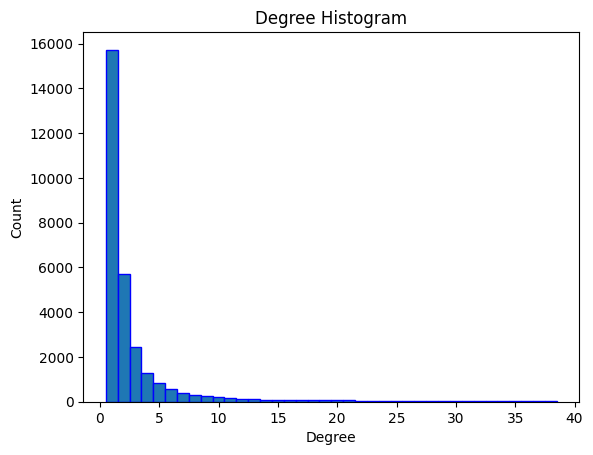

In [56]:
degree_list = graph_giant_bm2.degree()
# Create a histogram plot of the degree distribution
plt.hist(degree_list, bins=range(1, 40), align='left', edgecolor='blue')

# Set the plot attributes
plt.title("Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("Count")

# Show the plot
plt.show()

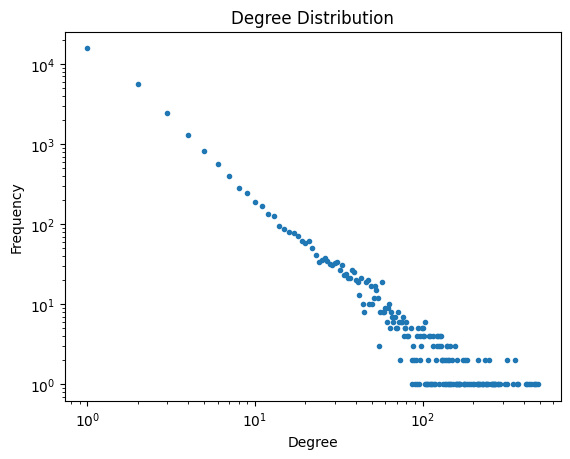

In [51]:
degree_list = graph_giant_bm2.degree()

# Calculate the degree frequency
degree_freq = np.bincount(degree_list)

# Create a log-log scatter plot of the degree distribution
plt.scatter(range(len(degree_freq)), degree_freq, marker='.')
plt.xscale('log')
plt.yscale('log')

# Set the plot attributes
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")

# Show the plot
plt.show()

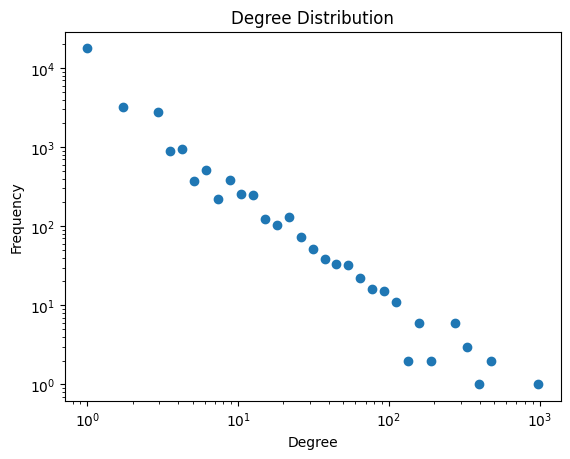

In [36]:
degree_list = graph_giant_bm2.degree()

# Calculate the degree frequency in logarithmic bins
degree_freq, degree_bins = np.histogram(degree_list, bins=np.logspace(np.log10(1), np.log10(max(degree_list) + 1), num=40))

# Create a log-binned plot of the degree distribution
plt.plot(degree_bins[:-1], degree_freq, linestyle='', marker='o')

# Set the plot attributes
plt.xscale('log')
plt.yscale('log')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")

# Show the plot
plt.show()

In [ ]:
graph_sentiment_nx = create_graph_nx(edges_sentiment)

In [53]:
edges_sentiment.head()

edge_source          edge_target              tweetid   
81957586  1394947865106132994  1335904794423275520  1636578105060990978  \
81957587   771686329545547777   947924373029171200  1636578108823289857   
81957588  1434457217974116352  1434457217974116352  1636578108827480064   
81957589  1574108986730758151                    0  1636578108911280128   
81957590   775440711453990913                    0  1636578109670432772   

                                                description   
81957586                              یا خدا الان میخورتمون  \
81957587  فراموش تان نمی کنیم برهان الیاسی جوان ساله اهل...   
81957588  آقا جانم دیدین این گوشیا خراب میشن تنظیمات کار...   
81957589  افشای فساد و تجارت خانوادگی علی خامنه ای و برا...   
81957590  صبح که از خواب پاشدم این پیامک برام اومده بود ...   

                     pubdate  weight  
81957586 2023-03-17 00:00:01       1  
81957587 2023-03-17 00:00:01       1  
81957588 2023-03-17 00:00:01       1  
81957589 2023-03-17 00:00:01       1  
81957590 2023-03-17 00:00:02       1

In [145]:
edges_complete = edges.copy()

In [146]:
edges_complete = edges_complete[:50000]

In [147]:
edges_complete['edge'] = 1
edges_complete.loc[edges_complete['edge_target'] == 0, 'edge'] = 0

In [148]:
edges_complete[edges_complete['edge'] == 1].info()

<class 'pandas.core.frame.DataFrame'>
Index: 44371 entries, 81957586 to 82007585
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   edge_source  44371 non-null  int64         
 1   edge_target  44371 non-null  int64         
 2   tweetid      44371 non-null  int64         
 3   description  44371 non-null  object        
 4   pubdate      44371 non-null  datetime64[ns]
 5   weight       44371 non-null  int64         
 6   edge         44371 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 2.7+ MB


In [149]:
edges_complete.head(5)

edge_source          edge_target              tweetid   
81957586  1394947865106132994  1335904794423275520  1636578105060990978  \
81957587   771686329545547777   947924373029171200  1636578108823289857   
81957588  1434457217974116352  1434457217974116352  1636578108827480064   
81957589  1574108986730758151                    0  1636578108911280128   
81957590   775440711453990913                    0  1636578109670432772   

                                                description   
81957586                              یا خدا الان میخورتمون  \
81957587  فراموش تان نمی کنیم برهان الیاسی جوان ساله اهل...   
81957588  آقا جانم دیدین این گوشیا خراب میشن تنظیمات کار...   
81957589  افشای فساد و تجارت خانوادگی علی خامنه ای و برا...   
81957590  صبح که از خواب پاشدم این پیامک برام اومده بود ...   

                     pubdate  weight  edge  
81957586 2023-03-17 00:00:01       1     1  
81957587 2023-03-17 00:00:01       1     1  
81957588 2023-03-17 00:00:01       1     1  
81957589 2023-03-17 00:00:01       1     0  
81957590 2023-03-17 00:00:02       1     0

In [150]:
len(edges_complete)

50000

In [151]:
edges_list = []
for i in range(10):
    start = round(len(edges_complete) / 10 * i)
    end = round(len(edges_complete) / 10 * (i + 1))
    print(start, end)
    edges_list.append(edges_complete[start : end])

0 5000
5000 10000
10000 15000
15000 20000
20000 25000
25000 30000
30000 35000
35000 40000
40000 45000
45000 50000


In [167]:
edges_list[0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 81957586 to 81962585
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   edge_source  5000 non-null   int64         
 1   edge_target  5000 non-null   int64         
 2   tweetid      5000 non-null   int64         
 3   description  5000 non-null   object        
 4   pubdate      5000 non-null   datetime64[ns]
 5   weight       5000 non-null   int64         
 6   edge         5000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 312.5+ KB


In [169]:
graph_list_nx = []
for df_edge in edges_list:
    graph_list_nx.append(create_graph_nx(df_edge))

In [170]:
graph_list_ig = []
for g in graph_list_nx:
    graph_list_ig.append(nx_to_ig(g))

In [171]:
graph_describe(graph_list_ig[0])

Number of vertices: 3,848
Number of edges: 3,903
Average degree: 2.03
Minmum degree: 1
Maximum degree: 65
Number of component: 804
Number of communities(Louvain): 829
Graph vertices attributes: ['user_id', 'description']
Graph edges attributes: ['weight']


In [172]:
for i, g in enumerate(graph_list_ig):
    graph_list_ig[i] = select_giant_component(graph_list_ig[i])

In [173]:
graph_describe(graph_list_ig[0])

Number of vertices: 1,565
Number of edges: 2,324
Average degree: 2.97
Minmum degree: 1
Maximum degree: 65
Number of component: 1
Number of communities(Louvain): 28
Graph vertices attributes: ['user_id', 'description']
Graph edges attributes: ['weight']


In [175]:
for g in graph_list_ig:
    g.es['name'] = range(len(g.es))

In [176]:
graph_describe(graph_list_ig[0])

Number of vertices: 1,565
Number of edges: 2,324
Average degree: 2.97
Minmum degree: 1
Maximum degree: 65
Number of component: 1
Number of communities(Louvain): 30
Graph vertices attributes: ['user_id', 'description']
Graph edges attributes: ['weight', 'name']


In [160]:
graph_reduce_list = []
for g in graph_list_ig:
    print(g.summary())
    graph_reduce_list.append(bm2(g, 0.4))

IGRAPH U-W- 1565 2324 -- 
+ attr: description (v), user_id (v), name (e), weight (e)

Calculating G_star edges list: vertex 1635
IGRAPH U-W- 1503 2250 -- 
+ attr: description (v), user_id (v), name (e), weight (e)

Calculating G_star edges list: vertex 1567
IGRAPH U-W- 1606 2418 -- 
+ attr: description (v), user_id (v), name (e), weight (e)

Calculating G_star edges list: vertex 1695
IGRAPH U-W- 1594 2322 -- 
+ attr: description (v), user_id (v), name (e), weight (e)

Calculating G_star edges list: vertex 1641
IGRAPH U-W- 1456 2096 -- 
+ attr: description (v), user_id (v), name (e), weight (e)

Calculating G_star edges list: vertex 1491
IGRAPH U-W- 1426 2082 -- 
+ attr: description (v), user_id (v), name (e), weight (e)

Calculating G_star edges list: vertex 1466
IGRAPH U-W- 1662 2454 -- 
+ attr: description (v), user_id (v), name (e), weight (e)

Calculating G_star edges list: vertex 1707
IGRAPH U-W- 1598 2381 -- 
+ attr: description (v), user_id (v), name (e), weight (e)

Calculating

In [177]:
graph_describe(graph_reduce_list[0])

Number of vertices: 416
Number of edges: 573
Average degree: 2.75
Minmum degree: 1
Maximum degree: 33
Number of component: 1
Number of communities(Louvain): 19
Graph vertices attributes: ['user_id', 'description', 'community']
Graph edges attributes: ['weight', 'name']


In [162]:
for i, g in enumerate(graph_reduce_list):
    graph_reduce_list[i] = select_giant_component(g)

In [163]:
for g in graph_reduce_list:
    graph_complete_communities = louvain_communities(g)

In [164]:
graph_describe(graph_reduce_list[9])

Number of vertices: 369
Number of edges: 481
Average degree: 2.61
Minmum degree: 1
Maximum degree: 32
Number of component: 1
Number of communities(Louvain): 17
Graph vertices attributes: ['user_id', 'description', 'community']
Graph edges attributes: ['weight', 'name']


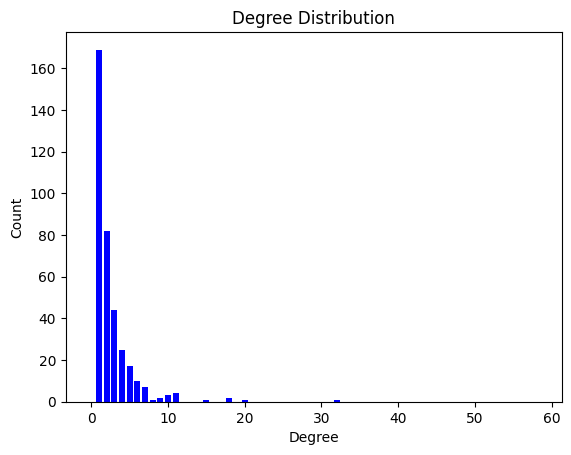

In [165]:
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt

# Get the degree of each vertex
# degrees = graph_list_ig[9].degree()
degrees = graph_reduce_list[9].degree()

# Create a histogram of the degrees
counts, bins = np.histogram(degrees, bins=range(0, 60 ))

# Plot the histogram
plt.bar(bins[:-1], counts, width=0.8, color='b')
plt.title("Degree Distribution")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

In [166]:

for i, g in enumerate(graph_reduce_list):
    f1 = open(str(i)+'.edgelist', 'w')
    f2 = open(str(i)+'.comm', 'w')
    for e in g.es:
        source = e.source
        target = e.target
        f1.write(f'{source} {target}\n')
    for v in g.vs:
        node = v.index
        community = v["community"]
        f2.write(f'{node} {community}\n')
f1.close()
f2.close()


# READ SAMPLE EDGES FILE

In [485]:
import pandas as pd
import pyarrow.feather as feather
file_path = 'E:\\Network_Science\\14- Thesis\\Dataset\\Twitter\\Netlytic\\edges_2023-03-17.feather'
edges = pd.DataFrame(feather.read_feather(file_path))
edges = edges[:10000]
edges.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 81957586 to 81967585
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   edge_source  10000 non-null  int64         
 1   edge_target  10000 non-null  int64         
 2   tweetid      10000 non-null  int64         
 3   description  10000 non-null  object        
 4   pubdate      10000 non-null  datetime64[ns]
 5   weight       10000 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 546.9+ KB


IGRAPH U--- 11 11 -- 
+ attr: user_id (v), name (e)


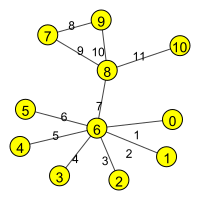

In [4]:
# Plot graph G2
import igraph as ig
import time
num_vertices = 11
edges = [(0, 6), (1, 6), (2, 6), (3, 6), (4, 6), (5, 6), (6, 8), (7, 9), (7, 8), (8, 9), (8, 10)]
# edges = [(0,5), (0,11), (1,2), (1,7), (2,3), (2,8), (3,4), (3,9), (4,12), (5,6), (5,7), (6,8), (6,11), (7,9), (8,10), (8,11), (9,10), (9,12), (10,11), (11,12)]
# edges = [(0,1), (0,5), (1,2), (1,6), (2,3), (2,7), (3,4), (3,8), (4,5), (5,9), (5,6), (6,7), (7,8), (7,10), (7,11), (8,9), (8,10), (9,11), (9,12), (10,11), (10,12), (0,3), (0,7), (1,8), (2,9), (2,4), (3,10), (4,11), (4,5), (5,12), (6,8), (6,9), (7,10), (8,11), (9,12), (10,11), (11,12)]
# edges = [(0,1), (0,5), (1,2), (1,6), (2,3), (2,8), (3,4), (3,9), (4,5), (4,10), (5,11), (5,6), (6,7), (7,12), (7,13), (8,9), (8,14), (9,15), (9,10), (10,16), (10,11), (11,17), (11,12), (12,13), (13,18), (13,14), (14,19), (15,16), (15,17), (16,18), (17,19)]
# edges = [(0,1), (0,5), (1,2), (1,6), (2,3), (3,7), (3,4), (4,8), (4,12), (5,9), (6,10), (6,7), (7,11), (8,13), (8,14), (9,15), (9,10), (10,16), (11,17), (12,18), (12,13), (13,19), (14,15), (16,17), (17,18)]
# edges = [(0,52), (0,4), (0,81), (0,53), (22, 75), (35, 43), (24, 82), (10, 71), (36, 68), (16, 40), (6, 61), (25, 19), (88, 30), (48, 83), (47, 79), (44, 80), (21, 27), (98, 31), (81, 52), (96, 87), (50, 45), (73, 90), (24, 31), (18, 35), (93, 59), (32, 84), (77, 99), (9, 42), (37, 89), (39, 94), (20, 53), (29, 67), (67, 49), (72, 95), (59, 78), (43, 85), (70, 26), (12, 46), (15, 38), (87, 47), (13, 17), (66, 92), (1, 44), (23, 26), (58, 64), (63, 97), (51, 69), (86, 90), (28, 48), (34, 41), (11, 28), (82, 44), (76, 89), (57, 74), (4, 32), (7, 33), (33, 39), (55, 80), (14, 56), (22, 60), (81, 89), (3, 55), (19, 54), (84, 91), (56, 73), (98, 100), (5, 17), (60, 96), (30, 62), (17, 29), (21, 45), (3, 41), (65, 92), (71, 88), (38, 76), (90, 96), (12, 23), (59, 68), (2, 46), (49, 72), (25, 37), (69, 77), (27, 51), (86, 96), (97, 99), (83, 96), (92, 95), (78, 100), (23, 50), (20, 42), (8, 76), (35, 74), (89, 99), (53, 86), (93, 98), (45, 90), (11, 15), (41, 90), (79, 82), (52, 86), (64, 93), (36, 62), (1, 31), (5, 38), (16, 18), (62, 86), (4, 75), (54, 73), (26, 40), (74, 91), (37, 67), (87, 94), (57, 82), (47, 51), (58, 92), (13, 46), (63, 87), (77, 92), (10, 32), (61, 92), (2, 19), (14, 99), (68, 84), (90, 97), (31, 55), (65, 76), (85, 97), (43, 61), (24, 38), (80, 89), (28, 54), (6, 29), (95, 100), (7, 66), (9, 72), (73, 94), (25, 66), (64, 88), (21, 78), (34, 59), (60, 77), (2, 40), (84, 99), (19, 39), (12, 23), (39, 69), (61, 80), (4, 48), (13, 63), (74, 85), (86, 96), (42, 71), (98, 100), (16, 18), (55, 83), (24, 44), (67, 89), (32, 70), (57, 94), (29, 91), (75, 99), (51, 58), (36, 87), (20, 26), (62, 92), (11, 72), (49, 95), (33, 68), (37, 94), (82, 98), (27, 90), (1, 41), (35, 79), (78, 95), (3, 76), (47, 69), (73, 89), (8, 53), (26, 84), (9, 74), (45, 93), (5, 22), (30, 46), (71, 92), (54, 82), (23, 97), (17, 93)]
G2 = ig.Graph(n=num_vertices, edges=edges)
G2.vs['user_id'] = range(len(G2.vs))
G2.es['name'] = range(1, len(G2.es)+1)
print(G2.summary())
ig.plot(G2, bbox=(200,200), vertex_label=G2.vs['user_id'], edge_label= G2.es['name'], vertex_color = 'yellow')
